# Batch Runs

## Base Case

In [1]:
import math

# Set initital flood probability perception
time_since_last_flood = 10 # Time since last flood used to update flood probability perception
steepness=0.1 # steepness only for initial calculation
midpoint=50 # midpoint only for initial calculation
flood_probability_percept = 1 / (1 + math.exp(steepness * (time_since_last_flood - midpoint)))

flood_probability_percept

0.9820137900379085

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
from model import AdaptationModel
import os
import pandas as pd
from mesa.batchrunner import batch_run
import os

run_name = "1_BaseCase_Batch"  # Replace with the desired run name
sub_folder = "export"
output_folder = f"./{sub_folder}/{run_name}/"
save_parameters = True

# Create the folders if they don't exist
os.makedirs(output_folder, exist_ok=True)

# Define the parameters to run the model with
batch_params_dict = {
        "seed": None,
        "number_of_households": 1000, # ! Set
        "network": "watts_strogatz",
        "flood_map_choice": "harvey",
        "time_since_last_flood": 10,
        "flood_probability": 0.02,
        "income_distribution": "uniform", # ! Change
        "income_min": 4000,
        "income_max": 80000,
        "low_income_threshold": 25000,
        "medium_income_threshold": 60000,
        "savings_share_low_income": 0.001, # ! Change
        "savings_share_medium_income": 0.04, # ! Change
        "savings_share_high_income": 0.2, # ! Change
        "flood_probability_percept": 0.9820137900379085,
        "flood_probability_percept_weight": 0.5,
        "flood_damage_percept_weight": 0.5,
        "savings_weight": 0.5,
        "income_weight": 0.2,
        "social_network_weight": 0.3,
        "self_efficacy_weight": 0.7,
        "coping_efficacy_weight": 0.3,
        "threat_threshold": 0.6,
        "coping_threshold": 0.3,
        "mitigation_effectiveness": 2.4,
        "cost_of_measure": 150000,
        "policy": False, # ! Change
        "low_risk_subsidy_height": 0, # ! Change
        "medium_risk_subsidy_height": 75000, # ! Change
        "high_risk_subsidy_height": 150000, # ! Change
        "low_income_subsidy_factor": 1, # ! Change
        "medium_income_subsidy_factor": 0.5, # ! Change
        "high_income_subsidy_factor": 0, # ! Change
        "low_risk_threshold": 0.000000000004845,
        "medium_risk_threshold": 0.0000000001
}

if save_parameters:
    # Create a DataFrame from the model parameters
    df_model_parameters = pd.DataFrame([batch_params_dict])

    # Save the DataFrame to an Excel file
    file_path = f"{output_folder}/{run_name}_parameters.csv"
    df_model_parameters.to_csv(file_path, index=False)

# Initialize the batch runner
results = batch_run(
    model_cls=AdaptationModel,
    parameters=batch_params_dict,
    number_processes=1, # Set to 1 for debugging and none for parallel computing and to None for parallel computing
    iterations=25,  # ! Number of iterations per parameter combination
    data_collection_period=1, # 1 = all timesteps; -1 = Only collect data at the end of the simulation
    max_steps=80,
    display_progress=True,
)

batch_results_df = pd.DataFrame(results)

batch_results_df

In [ ]:
# Save the results to a CSV file
batch_results_df.to_csv(f"{output_folder}/{run_name}_batch_results.csv", index=True)

### Plot all the different adaptation means together in one plot

C:\Users\justu\AppData\Local\Temp\ipykernel_13156\210354638.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


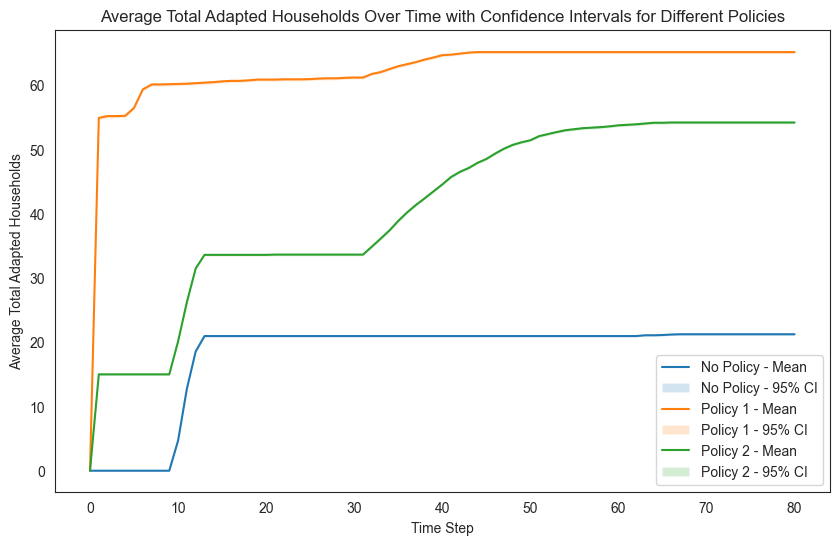

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Plot all the different adaptation means together in one plot
# Define the file paths
file_path1 = "./export/4_NoPolicy_Batch_100agents_25iter/4_NoPolicy_Batch_100agents_25iter_batch_results.csv"
file_path2 = "./export/4_Policy1_Batch_100agents_25iter/4_Policy1_Batch_100agents_25iter_batch_results.csv"
file_path3 = "./export/4_Policy2_Batch_100agents_25iter/4_Policy2_Batch_100agents_25iter_batch_results.csv"

# Read the datasets into pandas dataframes
no_policy_df = pd.read_csv(file_path1)
policy1_df = pd.read_csv(file_path2)
policy2_df = pd.read_csv(file_path3)

# Calculate mean and confidence interval for each policy
def calculate_stats(df):
    mean_data = df.groupby('Step')['TotalAdaptedHouseholds'].mean()
    ci_data = df.groupby('Step')['TotalAdaptedHouseholds'].sem() * 1.96  # Assuming 95% confidence interval
    return mean_data, ci_data

mean_no_policy, ci_no_policy = calculate_stats(no_policy_df)
mean_policy1, ci_policy1 = calculate_stats(policy1_df)
mean_policy2, ci_policy2 = calculate_stats(policy2_df)

# Set the plot style to remove the background grid
sns.set_style("white")

# Plot the results for each policy
plt.figure(figsize=(10, 6))

# Plot mean and confidence interval for No Policy
sns.lineplot(x=mean_no_policy.index, y=mean_no_policy, label='No Policy - Mean')
plt.fill_between(mean_no_policy.index, mean_no_policy - ci_no_policy, mean_no_policy + ci_no_policy, alpha=0.2, label='No Policy - 95% CI')

# Plot mean and confidence interval for Policy 1
sns.lineplot(x=mean_policy1.index, y=mean_policy1, label='Policy 1 - Mean')
plt.fill_between(mean_policy1.index, mean_policy1 - ci_policy1, mean_policy1 + ci_policy1, alpha=0.2, label='Policy 1 - 95% CI')

# Plot mean and confidence interval for Policy 2
sns.lineplot(x=mean_policy2.index, y=mean_policy2, label='Policy 2 - Mean')
plt.fill_between(mean_policy2.index, mean_policy2 - ci_policy2, mean_policy2 + ci_policy2, alpha=0.2, label='Policy 2 - 95% CI')

# Customize plot
plt.title('Average Total Adapted Households Over Time with Confidence Intervals for Different Policies')
plt.xlabel('Time Step')
plt.ylabel('Average Total Adapted Households')
plt.legend()

# Show the plot
plt.show()

## Savings Variation Case

In [ ]:
import math
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
from model import AdaptationModel
import os
import pandas as pd
from mesa.batchrunner import batch_run
import os

run_name = "2_SavingsShare_Batch_1000agents_3iter"  # Replace with the desired run name
sub_folder = "export"
output_folder = f"./{sub_folder}/{run_name}/"
save_parameters = True

# Create the folders if they don't exist
os.makedirs(output_folder, exist_ok=True)

# Define the parameters to run the model with
batch_params_dict = {
        "seed": None,
        "number_of_households": 1000, # ! Set
        "network": "watts_strogatz",
        "flood_map_choice": "harvey",
        "time_since_last_flood": 10,
        "flood_probability": 0.02,
        "income_distribution": "uniform", # ! Change
        "income_min": 4000,
        "income_max": 80000,
        "low_income_threshold": 25000,
        "medium_income_threshold": 60000,
        "savings_share_low_income": (0.0008, 0.001, 0.00125), # ! Change
        "savings_share_medium_income": (0.03, 0.04, 0.05), # ! Change
        "savings_share_high_income": (0.15, 0.2, 0.25), # ! Change
        "flood_probability_percept": 0.9820137900379085,
        "flood_probability_percept_weight": 0.5,
        "flood_damage_percept_weight": 0.5,
        "savings_weight": 0.5,
        "income_weight": 0.2,
        "social_network_weight": 0.3,
        "self_efficacy_weight": 0.7,
        "coping_efficacy_weight": 0.3,
        "threat_threshold": 0.6,
        "coping_threshold": 0.3,
        "mitigation_effectiveness": 2.4,
        "cost_of_measure": 150000,
        "policy": False, # ! Change
        "low_risk_subsidy_height": 0, # ! Change
        "medium_risk_subsidy_height": 75000, # ! Change
        "high_risk_subsidy_height": 150000, # ! Change
        "low_income_subsidy_factor": 1, # ! Change
        "medium_income_subsidy_factor": 0.5, # ! Change
        "high_income_subsidy_factor": 0, # ! Change
        "low_risk_threshold": 0.000000000004845,
        "medium_risk_threshold": 0.0000000001
}

if save_parameters:
    # Create a DataFrame from the model parameters
    df_model_parameters = pd.DataFrame([batch_params_dict])

    # Save the DataFrame to an Excel file
    file_path = f"{output_folder}/{run_name}_parameters.csv"
    df_model_parameters.to_csv(file_path, index=False)

# Initialize the batch runner
results = batch_run(
    model_cls=AdaptationModel,
    parameters=batch_params_dict,
    number_processes=1, # Set to 1 for debugging and none for parallel computing and to None for parallel computing
    iterations=3,  # ! Number of iterations per parameter combination
    data_collection_period=1, # 1 = all timesteps; -1 = Only collect data at the end of the simulation
    max_steps=80,
    display_progress=True,
)

batch_results_df = pd.DataFrame(results)

# Save the results to a CSV file
batch_results_df.to_csv(f"{output_folder}/{run_name}_batch_results.csv", index=True)

### Plot the variation in total adapted households for all saving share combinations

In [ ]:
# Define the parameters you want to vary
parameters = ["savings_share_low_income", "savings_share_medium_income", "savings_share_high_income"]

# Plot the results for each parameter combination
plt.figure(figsize=(12, 8))

for param in parameters:
    sns.lineplot(x='Step', y='TotalAdaptedHouseholds', data=savings_share_df, errorbar='sd', linewidth=2)

plt.ylim(0, savings_share_df['number_of_households'].max())

# Customize plot
plt.title('Total Adapted Households Over Time for Different Savings Share Parameter Combinations')
plt.xlabel('Time Step')
plt.ylabel('Total Adapted Households')

## Income Distribution Variation Case

In [ ]:
import math
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
from model import AdaptationModel
import os
import pandas as pd
from mesa.batchrunner import batch_run
import os

run_name = "3_IncomeDistribution_Batch_1000agents_3iter"  # Replace with the desired run name
sub_folder = "export"
output_folder = f"./{sub_folder}/{run_name}/"
save_parameters = True

# Create the folders if they don't exist
os.makedirs(output_folder, exist_ok=True)

# Define the parameters to run the model with
batch_params_dict = {
        "seed": None,
        "number_of_households": 1000, # ! Set
        "network": "watts_strogatz",
        "flood_map_choice": "harvey",
        "time_since_last_flood": 10,
        "flood_probability": 0.02,
        "income_distribution": ("uniform", "normal", "normal_low_peak", "normal_medium_peak"), # ! Change
        "income_min": 4000,
        "income_max": 80000,
        "low_income_threshold": 25000,
        "medium_income_threshold": 60000,
        "savings_share_low_income": 0.001, # ! Change
        "savings_share_medium_income": 0.04, # ! Change
        "savings_share_high_income": 0.2, # ! Change
        "flood_probability_percept": 0.9820137900379085,
        "flood_probability_percept_weight": 0.5,
        "flood_damage_percept_weight": 0.5,
        "savings_weight": 0.5,
        "income_weight": 0.2,
        "social_network_weight": 0.3,
        "self_efficacy_weight": 0.7,
        "coping_efficacy_weight": 0.3,
        "threat_threshold": 0.6,
        "coping_threshold": 0.3,
        "mitigation_effectiveness": 2.4,
        "cost_of_measure": 150000,
        "policy": False, # ! Change
        "low_risk_subsidy_height": 0, # ! Change
        "medium_risk_subsidy_height": 75000, # ! Change
        "high_risk_subsidy_height": 150000, # ! Change
        "low_income_subsidy_factor": 1, # ! Change
        "medium_income_subsidy_factor": 0.5, # ! Change
        "high_income_subsidy_factor": 0, # ! Change
        "low_risk_threshold": 0.000000000004845,
        "medium_risk_threshold": 0.0000000001
}

if save_parameters:
    # Create a DataFrame from the model parameters
    df_model_parameters = pd.DataFrame([batch_params_dict])

    # Save the DataFrame to an Excel file
    file_path = f"{output_folder}/{run_name}_parameters.csv"
    df_model_parameters.to_csv(file_path, index=False)

# Initialize the batch runner
results = batch_run(
    model_cls=AdaptationModel,
    parameters=batch_params_dict,
    number_processes=1, # Set to 1 for debugging and none for parallel computing and to None for parallel computing
    iterations=3,  # ! Number of iterations per parameter combination
    data_collection_period=1, # 1 = all timesteps; -1 = Only collect data at the end of the simulation
    max_steps=80,
    display_progress=True,
)

batch_results_df = pd.DataFrame(results)

# Save the results to a CSV file
batch_results_df.to_csv(f"{output_folder}/{run_name}_batch_results.csv", index=True)

## Experimentation

### No Policy 100agents 25iter

In [ ]:
from model import AdaptationModel
import os
import pandas as pd
from mesa.batchrunner import batch_run

run_name = "4_NoPolicy_Batch_100agents_25iter"  # Replace with the desired run name
sub_folder = "export"
output_folder = f"./{sub_folder}/{run_name}/"
save_parameters = True

# Create the folders if they don't exist
os.makedirs(output_folder, exist_ok=True)

# Define the parameters to run the model with
batch_params_dict = {
        "seed": None,
        "number_of_households": 100, # ! Set
        "network": "watts_strogatz",
        "flood_map_choice": "harvey",
        "time_since_last_flood": 10,
        "flood_probability": 0.02,
        "income_distribution": "uniform", # ! Change
        "income_min": 4000,
        "income_max": 80000,
        "low_income_threshold": 25000,
        "medium_income_threshold": 60000,
        "savings_share_low_income": 0.001, # ! Change
        "savings_share_medium_income": 0.04, # ! Change
        "savings_share_high_income": 0.2, # ! Change
        "flood_probability_percept": 0.9820137900379085,
        "flood_probability_percept_weight": 0.5,
        "flood_damage_percept_weight": 0.5,
        "savings_weight": 0.5,
        "income_weight": 0.2,
        "social_network_weight": 0.3,
        "self_efficacy_weight": 0.7,
        "coping_efficacy_weight": 0.3,
        "threat_threshold": 0.6,
        "coping_threshold": 0.3,
        "mitigation_effectiveness": 2.4,
        "cost_of_measure": 150000,
        "policy": False, # ! Change
        "low_risk_subsidy_height": 0, # ! Change
        "medium_risk_subsidy_height": 75000, # ! Change
        "high_risk_subsidy_height": 150000, # ! Change
        "low_income_subsidy_factor": 1, # ! Change
        "medium_income_subsidy_factor": 0.5, # ! Change
        "high_income_subsidy_factor": 0, # ! Change
        "low_risk_threshold": 0.000000000004845,
        "medium_risk_threshold": 0.0000000001
}

if save_parameters:
    # Create a DataFrame from the model parameters
    df_model_parameters = pd.DataFrame([batch_params_dict])

    # Save the DataFrame to an Excel file
    file_path = f"{output_folder}/{run_name}_parameters.csv"
    df_model_parameters.to_csv(file_path, index=False)

# Initialize the batch runner
results = batch_run(
    model_cls=AdaptationModel,
    parameters=batch_params_dict,
    number_processes=1, # Set to 1 for debugging and none for parallel computing and to None for parallel computing
    iterations=25,  # ! Number of iterations per parameter combination
    data_collection_period=1, # 1 = all timesteps; -1 = Only collect data at the end of the simulation
    max_steps=80,
    display_progress=True,
)

batch_results_df = pd.DataFrame(results)

batch_results_df

# Save the results to a CSV file
batch_results_df.to_csv(f"{output_folder}/{run_name}_batch_results.csv", index=True)

In [ ]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

# Calculate the mean and confidence interval
mean_data = batch_results_df.groupby('Step')['TotalAdaptedHouseholds'].mean()
ci_data = batch_results_df.groupby('Step')['TotalAdaptedHouseholds'].sem() * 1.96  # Assuming 95% confidence interval

# Set the plot style to remove the background grid
sns.set_style("white")

# Plot the results
plt.figure(figsize=(10, 6))

# Plot mean
sns.lineplot(x=mean_data.index, y=mean_data, label='Mean')

# Plot confidence interval
plt.fill_between(mean_data.index, mean_data - ci_data, mean_data + ci_data, alpha=0.2, label='95% CI')

# Customize plot
plt.title('Average Total Adapted Households Over Time with Confidence Interval')
plt.xlabel('Time Step')
plt.ylabel('Average Total Adapted Households')
plt.legend()

plt.savefig(f"{output_folder}/{run_name}_adapted_households.png", bbox_inches='tight', dpi=150)

# Show the plot
plt.show()

### Policy 1 100agents 25iter

In [ ]:
from model import AdaptationModel
import os
import pandas as pd
from mesa.batchrunner import batch_run

run_name = "4_Policy1_Batch_100agents_25iter"  # Replace with the desired run name
sub_folder = "export"
output_folder = f"./{sub_folder}/{run_name}/"
save_parameters = True

# Create the folders if they don't exist
os.makedirs(output_folder, exist_ok=True)

# Define the parameters to run the model with
batch_params_dict = {
        "seed": None,
        "number_of_households": 100, # ! Set
        "network": "watts_strogatz",
        "flood_map_choice": "harvey",
        "time_since_last_flood": 10,
        "flood_probability": 0.02,
        "income_distribution": "uniform", # ! Change
        "income_min": 4000,
        "income_max": 80000,
        "low_income_threshold": 25000,
        "medium_income_threshold": 60000,
        "savings_share_low_income": 0.001, # ! Change
        "savings_share_medium_income": 0.04, # ! Change
        "savings_share_high_income": 0.2, # ! Change
        "flood_probability_percept": 0.9820137900379085,
        "flood_probability_percept_weight": 0.5,
        "flood_damage_percept_weight": 0.5,
        "savings_weight": 0.5,
        "income_weight": 0.2,
        "social_network_weight": 0.3,
        "self_efficacy_weight": 0.7,
        "coping_efficacy_weight": 0.3,
        "threat_threshold": 0.6,
        "coping_threshold": 0.3,
        "mitigation_effectiveness": 2.4,
        "cost_of_measure": 150000,
        "policy": True, # ! Change
        "low_risk_subsidy_height": 0, # ! Change
        "medium_risk_subsidy_height": 75000, # ! Change
        "high_risk_subsidy_height": 150000, # ! Change
        "low_income_subsidy_factor": 1, # ! Change
        "medium_income_subsidy_factor": 1, # ! Change
        "high_income_subsidy_factor": 1, # ! Change
        "low_risk_threshold": 0.000000000004845,
        "medium_risk_threshold": 0.0000000001
}

if save_parameters:
    # Create a DataFrame from the model parameters
    df_model_parameters = pd.DataFrame([batch_params_dict])

    # Save the DataFrame to an Excel file
    file_path = f"{output_folder}/{run_name}_parameters.csv"
    df_model_parameters.to_csv(file_path, index=False)

# Initialize the batch runner
results = batch_run(
    model_cls=AdaptationModel,
    parameters=batch_params_dict,
    number_processes=1, # Set to 1 for debugging and none for parallel computing and to None for parallel computing
    iterations=25,  # ! Number of iterations per parameter combination
    data_collection_period=1, # 1 = all timesteps; -1 = Only collect data at the end of the simulation
    max_steps=80,
    display_progress=True,
)

batch_results_df = pd.DataFrame(results)

batch_results_df

# Save the results to a CSV file
batch_results_df.to_csv(f"{output_folder}/{run_name}_batch_results.csv", index=True)

### Policy 2 100agents 25iter

In [ ]:
from model import AdaptationModel
import os
import pandas as pd
from mesa.batchrunner import batch_run

run_name = "4_Policy2_Batch_100agents_25iter"  # Replace with the desired run name
sub_folder = "export"
output_folder = f"./{sub_folder}/{run_name}/"
save_parameters = True

# Create the folders if they don't exist
os.makedirs(output_folder, exist_ok=True)

# Define the parameters to run the model with
batch_params_dict = {
        "seed": None,
        "number_of_households": 100, # ! Set
        "network": "watts_strogatz",
        "flood_map_choice": "harvey",
        "time_since_last_flood": 10,
        "flood_probability": 0.02,
        "income_distribution": "uniform", # ! Change
        "income_min": 4000,
        "income_max": 80000,
        "low_income_threshold": 25000,
        "medium_income_threshold": 60000,
        "savings_share_low_income": 0.001, # ! Change
        "savings_share_medium_income": 0.04, # ! Change
        "savings_share_high_income": 0.2, # ! Change
        "flood_probability_percept": 0.9820137900379085,
        "flood_probability_percept_weight": 0.5,
        "flood_damage_percept_weight": 0.5,
        "savings_weight": 0.5,
        "income_weight": 0.2,
        "social_network_weight": 0.3,
        "self_efficacy_weight": 0.7,
        "coping_efficacy_weight": 0.3,
        "threat_threshold": 0.6,
        "coping_threshold": 0.3,
        "mitigation_effectiveness": 2.4,
        "cost_of_measure": 150000,
        "policy": True, # ! Change
        "low_risk_subsidy_height": 0, # ! Change
        "medium_risk_subsidy_height": 75000, # ! Change
        "high_risk_subsidy_height": 150000, # ! Change
        "low_income_subsidy_factor": 1, # ! Change
        "medium_income_subsidy_factor": 0.5, # ! Change
        "high_income_subsidy_factor": 0, # ! Change
        "low_risk_threshold": 0.000000000004845,
        "medium_risk_threshold": 0.0000000001
}

if save_parameters:
    # Create a DataFrame from the model parameters
    df_model_parameters = pd.DataFrame([batch_params_dict])

    # Save the DataFrame to an Excel file
    file_path = f"{output_folder}/{run_name}_parameters.csv"
    df_model_parameters.to_csv(file_path, index=False)

# Initialize the batch runner
results = batch_run(
    model_cls=AdaptationModel,
    parameters=batch_params_dict,
    number_processes=1, # Set to 1 for debugging and none for parallel computing and to None for parallel computing
    iterations=25,  # ! Number of iterations per parameter combination
    data_collection_period=1, # 1 = all timesteps; -1 = Only collect data at the end of the simulation
    max_steps=80,
    display_progress=True,
)

batch_results_df = pd.DataFrame(results)

batch_results_df

# Save the results to a CSV file
batch_results_df.to_csv(f"{output_folder}/{run_name}_batch_results.csv", index=True)

In [ ]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

# Calculate the mean and confidence interval
mean_data = batch_results_df.groupby('Step')['TotalAdaptedHouseholds'].mean()
ci_data = batch_results_df.groupby('Step')['TotalAdaptedHouseholds'].sem() * 1.96  # Assuming 95% confidence interval

# Set the plot style to remove the background grid
sns.set_style("white")

# Plot the results
plt.figure(figsize=(10, 6))

# Plot mean
sns.lineplot(x=mean_data.index, y=mean_data, label='Mean')

# Plot confidence interval
plt.fill_between(mean_data.index, mean_data - ci_data, mean_data + ci_data, alpha=0.2, label='95% CI')

# Customize plot
plt.title('Average Total Adapted Households Over Time with Confidence Interval')
plt.xlabel('Time Step')
plt.ylabel('Average Total Adapted Households')
plt.legend()

plt.savefig(f"{output_folder}/{run_name}_adapted_households.png", bbox_inches='tight', dpi=150)

# Show the plot
plt.show()

### Plot all the different adaptation means together in one plot

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Plot all the different adaptation means together in one plot
# Define the file paths
file_path1 = "./export/4_NoPolicy_Batch_100agents_25iter/4_NoPolicy_Batch_100agents_25iter_batch_results.csv"
file_path2 = "./export/4_Policy1_Batch_100agents_25iter/4_Policy1_Batch_100agents_25iter_batch_results.csv"
file_path3 = "./export/4_Policy2_Batch_100agents_25iter/4_Policy2_Batch_100agents_25iter_batch_results.csv"

# Read the datasets into pandas dataframes
no_policy_df = pd.read_csv(file_path1)
policy1_df = pd.read_csv(file_path2)
policy2_df = pd.read_csv(file_path3)

# Calculate mean and confidence interval for each policy
def calculate_stats(df):
    mean_data = df.groupby('Step')['TotalAdaptedHouseholds'].mean()
    ci_data = df.groupby('Step')['TotalAdaptedHouseholds'].sem() * 1.96  # Assuming 95% confidence interval
    return mean_data, ci_data

mean_no_policy, ci_no_policy = calculate_stats(no_policy_df)
mean_policy1, ci_policy1 = calculate_stats(policy1_df)
mean_policy2, ci_policy2 = calculate_stats(policy2_df)

# Set the plot style to remove the background grid
sns.set_style("white")

# Plot the results for each policy
plt.figure(figsize=(10, 6))

# Plot mean and confidence interval for No Policy
sns.lineplot(x=mean_no_policy.index, y=mean_no_policy, label='No Policy - Mean')
plt.fill_between(mean_no_policy.index, mean_no_policy - ci_no_policy, mean_no_policy + ci_no_policy, alpha=0.2, label='No Policy - 95% CI')

# Plot mean and confidence interval for Policy 1
sns.lineplot(x=mean_policy1.index, y=mean_policy1, label='Policy 1 - Mean')
plt.fill_between(mean_policy1.index, mean_policy1 - ci_policy1, mean_policy1 + ci_policy1, alpha=0.2, label='Policy 1 - 95% CI')

# Plot mean and confidence interval for Policy 2
sns.lineplot(x=mean_policy2.index, y=mean_policy2, label='Policy 2 - Mean')
plt.fill_between(mean_policy2.index, mean_policy2 - ci_policy2, mean_policy2 + ci_policy2, alpha=0.2, label='Policy 2 - 95% CI')

# Customize plot
plt.title('Average Total Adapted Households Over Time with Confidence Intervals for Different Policies')
plt.xlabel('Time Step')
plt.ylabel('Average Total Adapted Households')
plt.legend()

# Show the plot
plt.show()

## Policy iterations with height parameter sweep

### Policy 1 100agents 5iter + Sweep

In [ ]:
from model import AdaptationModel
import os
import pandas as pd
from mesa.batchrunner import batch_run

run_name = "5_Policy1_Batch_100agents_5iter_Sweep"  # Replace with the desired run name
sub_folder = "export"
output_folder = f"./{sub_folder}/{run_name}/"
save_parameters = True

# Create the folders if they don't exist
os.makedirs(output_folder, exist_ok=True)

# Define the parameters to run the model with
batch_params_dict = {
        "seed": None,
        "number_of_households": 100, # ! Set
        "network": "watts_strogatz",
        "flood_map_choice": "harvey",
        "time_since_last_flood": 10,
        "flood_probability": 0.02,
        "income_distribution": "uniform", # ! Change
        "income_min": 4000,
        "income_max": 80000,
        "low_income_threshold": 25000,
        "medium_income_threshold": 60000,
        "savings_share_low_income": 0.001, # ! Change
        "savings_share_medium_income": 0.04, # ! Change
        "savings_share_high_income": 0.2, # ! Change
        "flood_probability_percept": 0.9820137900379085,
        "flood_probability_percept_weight": 0.5,
        "flood_damage_percept_weight": 0.5,
        "savings_weight": 0.5,
        "income_weight": 0.2,
        "social_network_weight": 0.3,
        "self_efficacy_weight": 0.7,
        "coping_efficacy_weight": 0.3,
        "threat_threshold": 0.6,
        "coping_threshold": 0.3,
        "mitigation_effectiveness": 2.4,
        "cost_of_measure": 150000,
        "policy": True, # ! Change
        "low_risk_subsidy_height": 0, # ! Change
        "medium_risk_subsidy_height": (2500, 50000, 75000), # ! Change
        "high_risk_subsidy_height": (100000, 125000, 150000), # ! Change
        "low_income_subsidy_factor": 1, # ! Change
        "medium_income_subsidy_factor": 1, # ! Change
        "high_income_subsidy_factor": 1, # ! Change
        "low_risk_threshold": 0.000000000004845,
        "medium_risk_threshold": 0.0000000001
}

if save_parameters:
    # Create a DataFrame from the model parameters
    df_model_parameters = pd.DataFrame([batch_params_dict])

    # Save the DataFrame to an Excel file
    file_path = f"{output_folder}/{run_name}_parameters.csv"
    df_model_parameters.to_csv(file_path, index=False)

# Initialize the batch runner
results = batch_run(
    model_cls=AdaptationModel,
    parameters=batch_params_dict,
    number_processes=1, # Set to 1 for debugging and none for parallel computing and to None for parallel computing
    iterations=5,  # ! Number of iterations per parameter combination
    data_collection_period=1, # 1 = all timesteps; -1 = Only collect data at the end of the simulation
    max_steps=80,
    display_progress=True,
)

batch_results_df = pd.DataFrame(results)

batch_results_df

# Save the results to a CSV file
batch_results_df.to_csv(f"{output_folder}/{run_name}_batch_results.csv", index=True)

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming you already have batch_results_df DataFrame

# Set the style for the plot
sns.set(style="darkgrid")

# Group by parameter combinations and take the maximum TotalAdaptedHouseholds at each time step
grouped_df = batch_results_df.groupby(['low_risk_subsidy_height', 'medium_risk_subsidy_height', 'high_risk_subsidy_height', 'iteration', 'Step'])['TotalAdaptedHouseholds'].max().reset_index()

# Create a color palette for different subsidy values
palette = sns.color_palette("viridis", len(batch_results_df['low_risk_subsidy_height'].unique()))

# Plot the total adapted households over time for each parameter combination
plt.figure(figsize=(12, 8))
sns.lineplot(x='Step', y='TotalAdaptedHouseholds', hue='low_risk_subsidy_height', style='medium_risk_subsidy_height',
             markers=True, data=grouped_df, palette=palette)

# Customize the plot
plt.title('Total Adapted Households Over Time for Different Subsidy Combinations')
plt.xlabel('Time Steps')
plt.ylabel('Total Adapted Households')

# Show the legend
plt.legend(title='Low Risk Subsidy Height', bbox_to_anchor=(1.05, 1), loc='upper left')

# Show the plot
plt.show()


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming you already have batch_results_df DataFrame

# Set the style for the plot
sns.set(style="darkgrid")

# Group by policy combinations and take the mean and standard deviation of TotalAdaptedHouseholds at each time step
grouped_df = batch_results_df.groupby(['policy', 'iteration', 'Step'])['TotalAdaptedHouseholds'].agg(['mean', 'std']).reset_index()

# Create a color palette for different policies
palette = sns.color_palette("viridis", len(batch_results_df['policy'].unique()))

# Plot the total adapted households over time for each policy combination with confidence intervals
plt.figure(figsize=(12, 8))
sns.lineplot(x='Step', y='mean', hue='policy', markers=True, errorbar=('ci', 95), err_style='band', palette=palette, data=grouped_df)

# Customize the legend
plt.ylim(0, 100)
plt.title('Total Adapted Households Over Time for Different Policies with Confidence Intervals')
plt.xlabel('Time Steps')
plt.ylabel('Total Adapted Households')

legend_labels = ['Policy 1 (Mean)', 'Policy 1 (95% CI)']  # Replace with the actual policy names

# Show the main legend with mean values
plt.legend(title='Policy', labels=legend_labels, bbox_to_anchor=(1.05, 1), loc='upper left')

# Show the plot
plt.show()


### Policy 2 100agents 5iter + sweep

In [ ]:
from model import AdaptationModel
import os
import pandas as pd
from mesa.batchrunner import batch_run

run_name = "5_Policy2_Batch_100agents_5iter_sweep"  # Replace with the desired run name
sub_folder = "export"
output_folder = f"./{sub_folder}/{run_name}/"
save_parameters = True

# Create the folders if they don't exist
os.makedirs(output_folder, exist_ok=True)

# Define the parameters to run the model with
batch_params_dict = {
        "seed": None,
        "number_of_households": 100, # ! Set
        "network": "watts_strogatz",
        "flood_map_choice": "harvey",
        "time_since_last_flood": 10,
        "flood_probability": 0.02,
        "income_distribution": "uniform", # ! Change
        "income_min": 4000,
        "income_max": 80000,
        "low_income_threshold": 25000,
        "medium_income_threshold": 60000,
        "savings_share_low_income": 0.001, # ! Change
        "savings_share_medium_income": 0.04, # ! Change
        "savings_share_high_income": 0.2, # ! Change
        "flood_probability_percept": 0.9820137900379085,
        "flood_probability_percept_weight": 0.5,
        "flood_damage_percept_weight": 0.5,
        "savings_weight": 0.5,
        "income_weight": 0.2,
        "social_network_weight": 0.3,
        "self_efficacy_weight": 0.7,
        "coping_efficacy_weight": 0.3,
        "threat_threshold": 0.6,
        "coping_threshold": 0.3,
        "mitigation_effectiveness": 2.4,
        "cost_of_measure": 150000,
        "policy": True, # ! Change
        "low_risk_subsidy_height": 0, # ! Change
        "medium_risk_subsidy_height": (2500, 50000, 75000), # ! Change
        "high_risk_subsidy_height": (100000, 125000, 150000), # ! Change
        "low_income_subsidy_factor": 1, # ! Change
        "medium_income_subsidy_factor": 0.5, # ! Change
        "high_income_subsidy_factor": 0, # ! Change
        "low_risk_threshold": 0.000000000004845,
        "medium_risk_threshold": 0.0000000001
}

if save_parameters:
    # Create a DataFrame from the model parameters
    df_model_parameters = pd.DataFrame([batch_params_dict])

    # Save the DataFrame to an Excel file
    file_path = f"{output_folder}/{run_name}_parameters.csv"
    df_model_parameters.to_csv(file_path, index=False)

# Initialize the batch runner
results = batch_run(
    model_cls=AdaptationModel,
    parameters=batch_params_dict,
    number_processes=1, # Set to 1 for debugging and none for parallel computing and to None for parallel computing
    iterations=5,  # ! Number of iterations per parameter combination
    data_collection_period=1, # 1 = all timesteps; -1 = Only collect data at the end of the simulation
    max_steps=80,
    display_progress=True,
)

batch_results_df = pd.DataFrame(results)

batch_results_df

# Save the results to a CSV file
batch_results_df.to_csv(f"{output_folder}/{run_name}_batch_results.csv", index=True)

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming you already have batch_results_df DataFrame

# Set the style for the plot
sns.set(style="darkgrid")

# Group by policy combinations and take the mean and standard deviation of TotalAdaptedHouseholds at each time step
grouped_df = batch_results_df.groupby(['policy', 'iteration', 'Step'])['TotalAdaptedHouseholds'].agg(['mean', 'std']).reset_index()

# Create a color palette for different policies
palette = sns.color_palette("viridis", len(batch_results_df['policy'].unique()))

# Plot the total adapted households over time for each policy combination with confidence intervals
plt.figure(figsize=(12, 8))
sns.lineplot(x='Step', y='mean', hue='policy', markers=True, errorbar=('ci', 95), err_style='band', palette=palette, data=grouped_df)

# Customize the legend
plt.ylim(0, 100)
plt.title('Total Adapted Households Over Time for Different Policies with Confidence Intervals')
plt.xlabel('Time Steps')
plt.ylabel('Total Adapted Households')

legend_labels = ['Policy 2 (Mean)', 'Policy 2 (95% CI)']  # Replace with the actual policy names

# Show the main legend with mean values
plt.legend(title='Policy', labels=legend_labels, bbox_to_anchor=(1.05, 1), loc='upper left')

# Show the plot
plt.show()


### Plot all the different adaptation means together in one plot

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Define the file paths
file_path1 = "./export/4_NoPolicy_Batch_100agents_25iter/4_NoPolicy_Batch_100agents_25iter_batch_results.csv"
file_path2 = "./export/5_Policy1_Batch_100agents_5iter_Sweep/5_Policy1_Batch_100agents_5iter_Sweep_batch_results.csv"
file_path3 = "./export/5_Policy2_Batch_100agents_5iter_sweep/5_Policy2_Batch_100agents_5iter_sweep_batch_results.csv"

# Read the datasets into pandas dataframes
no_policy_df = pd.read_csv(file_path1)
policy1_df = pd.read_csv(file_path2)
policy2_df = pd.read_csv(file_path3)

In [ ]:
# Combine the dataframes into one for easier plotting
combined_df = pd.concat([no_policy_df.assign(policy='No Policy'), policy1_df.assign(policy='Policy 1'), policy2_df.assign(policy='Policy 2')])

# Add the additional policies to the combined_df
# Specific subsidy heights relative to Policy 1 (Max Money)
specific_subsidy_policy1_df = combined_df[(combined_df['policy'] == 'Policy 1') & (combined_df['medium_risk_subsidy_height'] == 75000) & (combined_df['high_risk_subsidy_height'] == 150000)]
specific_subsidy_policy1_df['policy'] = 'Policy 1, Max Money'  # Update the policy label
combined_df = pd.concat([combined_df, specific_subsidy_policy1_df])

# Specific subsidy heights relative to Policy 2 (Max Money)
specific_subsidy_policy2_df = combined_df[(combined_df['policy'] == 'Policy 2') & (combined_df['medium_risk_subsidy_height'] == 75000) & (combined_df['high_risk_subsidy_height'] == 150000)]
specific_subsidy_policy2_df['policy'] = 'Policy 2, Max Money'  # Update the policy label
combined_df = pd.concat([combined_df, specific_subsidy_policy2_df])

# Filter the dataframe to get data for the last time step and where agents have adapted
last_time_step_adapted_df = combined_df[(combined_df['Step'] == combined_df['Step'].max()) & (combined_df['IsAdapted'] == True)]

last_time_step_adapted_filtered_df = last_time_step_adapted_df[['RunId', 'iteration', 'policy', 'AgentID', 'IncomeGroup', 'IndividualRisk', 'IsAdapted']]

last_time_step_adapted_filtered_df


In [ ]:
# Count the number of adapted households for each iteration
grouped_df = last_time_step_adapted_filtered_df.groupby(['RunId', 'iteration', 'policy', 'IncomeGroup', 'IndividualRisk'])['IsAdapted'].sum().reset_index()

# Take the mean across iterations
grouped_df = grouped_df.groupby(['policy', 'IncomeGroup', 'IndividualRisk'])['IsAdapted'].mean().reset_index()

grouped_df

In [ ]:
# Set the style for the plot
sns.set(style="darkgrid")

# Define the "viridis" color palette
palette = sns.color_palette("viridis", n_colors=len(grouped_df['IncomeGroup'].unique()))

# Plot the number of adapted households per income and risk group for each policy
plt.figure(figsize=(12, 8))
sns.barplot(x='policy', y='IsAdapted', hue='IncomeGroup', ci=None, palette=palette, data=grouped_df)

# Customize the plot
plt.title('Number of Adapted Households by Policy, Income, and Risk Group')
plt.xlabel('Policy')
plt.ylabel('Number of Adapted Households')

# Show the plot
plt.show()
